In [1]:
### set up the notebook
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
### load the data

# load the ACCESS minus SWOT ECMWF PSD data from our npz file
ds = xr.open_dataset('./data/WTD_PSD_SWOT_FSP_regions.nc')

In [3]:
### calculate the mean ACCESS minus ECMWF PSD for each region

bs_6_psd_mean = np.nanmean(ds.bs_6_model_resid_psd.values, axis=0)
bs_19_psd_mean = np.nanmean(ds.bs_19_model_resid_psd.values, axis=0)
alb_8_psd_mean = np.nanmean(ds.alb_8_model_resid_psd.values, axis=0)
alb_21_psd_mean = np.nanmean(ds.alb_21_model_resid_psd.values, axis=0)
crp_psd_mean = np.nanmean(ds.crp_model_resid_psd.values, axis=0)
dvr_psd_mean = np.nanmean(ds.dvr_model_resid_psd.values, axis=0)

# Interpolate bass strait and albany on consistent freq intervals
bs_19_psd_mean_interp = np.interp(ds.bs_6_freq.values, ds.bs_19_freq.values, bs_19_psd_mean)
alb_8_psd_mean_interp = np.interp(ds.alb_21_freq.values, ds.alb_8_freq.values, alb_8_psd_mean)

# take mean of both
bs_freq = ds.bs_6_freq.values
bs_psd_mean = (bs_19_psd_mean_interp + bs_6_psd_mean)/2
alb_freq = ds.alb_21_freq.values
alb_psd_mean = (alb_8_psd_mean_interp + alb_21_psd_mean)/2
crp_freq = ds.crp_freq.values
dvr_freq = ds.dvr_freq.values

/tmp/ipykernel_1758066/4231684895.py:18: RuntimeWarning: divide by zero encountered in true_divide
  ax[0,0].loglog(1/crp_freq, crp_psd_mean, label='Residual wet troposphere', c='C0', lw=3)
/tmp/ipykernel_1758066/4231684895.py:19: RuntimeWarning: divide by zero encountered in true_divide
  ax[1,0].loglog(1/alb_freq, alb_psd_mean, label='ACCESS-C wet trop', c='C0', lw=3)
/tmp/ipykernel_1758066/4231684895.py:20: RuntimeWarning: divide by zero encountered in true_divide
  ax[0,1].loglog(1/dvr_freq, dvr_psd_mean, label='ACCESS-C wet trop', c='C0', lw=3)
/tmp/ipykernel_1758066/4231684895.py:21: RuntimeWarning: divide by zero encountered in true_divide
  ax[1,1].loglog(1/bs_freq, bs_psd_mean, label='ACCESS-C wet trop', c='C0', lw=3)


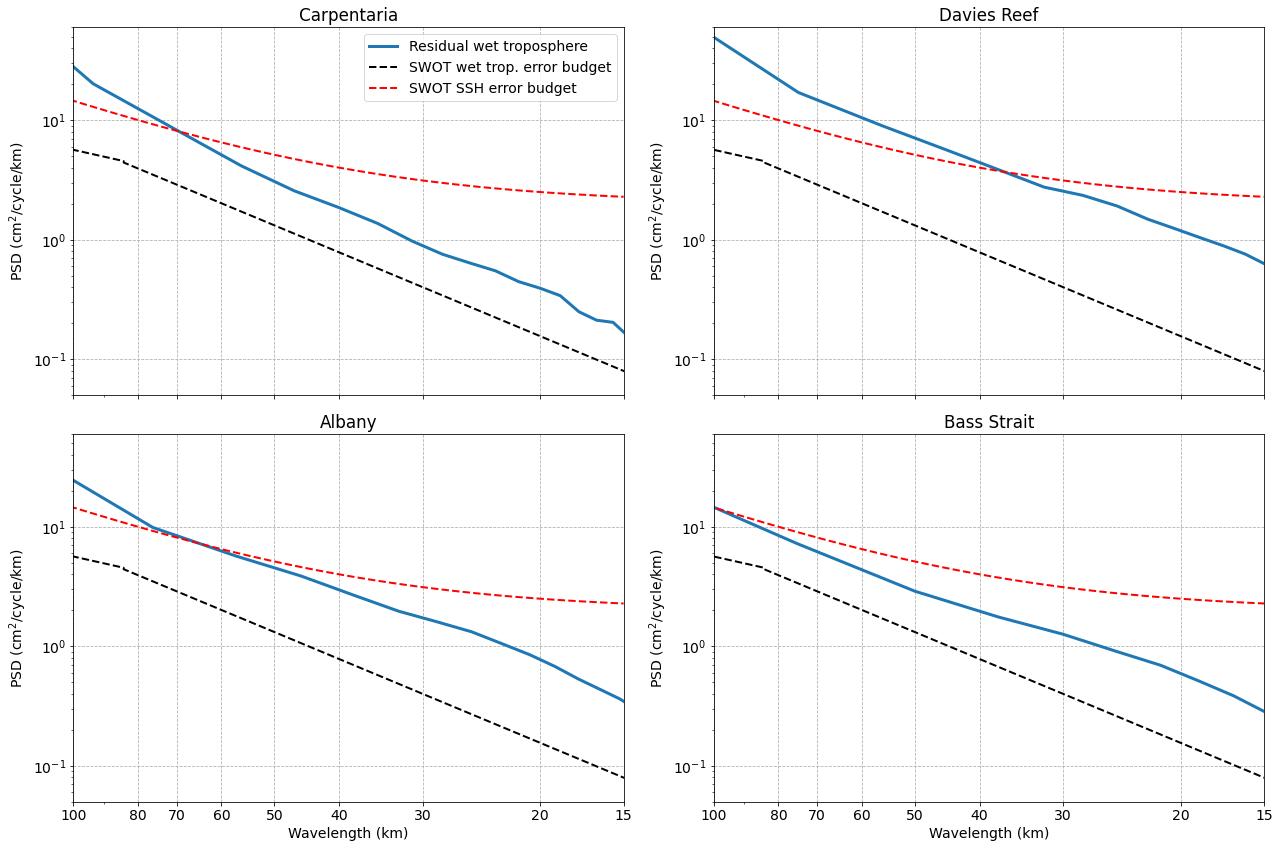

In [8]:
### plot the mean PSDs

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2, 2, figsize=(18,12), sharex = True)

# define trop error from SWOT error doc
f_1 = np.array((1e-3, 0.0049))
trop_error_1 = 0.205*f_1**(-0.7911)
f_2 = np.array((0.0049, 0.0119))
trop_error_2 = 0.0179*f_2**(-1.2492)
f_3 = np.array((0.0119, 1/4))
trop_error_3 = 1.448e-4*f_3**(-2.33)
trop_error = np.concatenate((trop_error_1, trop_error_2, trop_error_3))
f_trop_error = np.concatenate((f_1, f_2, f_3))
f_ssh_error = np.linspace(1/1000, 1/15, 100)
ssh_error = 2+1.25e-3*f_ssh_error**(-2)

ax[0,0].loglog(1/crp_freq, crp_psd_mean, label='Residual wet troposphere', c='C0', lw=3)    
ax[1,0].loglog(1/alb_freq, alb_psd_mean, label='ACCESS-C wet trop', c='C0', lw=3)  
ax[0,1].loglog(1/dvr_freq, dvr_psd_mean, label='ACCESS-C wet trop', c='C0', lw=3) 
ax[1,1].loglog(1/bs_freq, bs_psd_mean, label='ACCESS-C wet trop', c='C0', lw=3)

for i in range(2):
    for j in range(2):
        ax[i,j].loglog(1/f_trop_error, trop_error, 'k', lw=2, label='SWOT wet trop. error budget', ls='--')
        ax[i,j].loglog(1/f_ssh_error, ssh_error, linewidth=2, c='red', label='SWOT SSH error budget', ls='--')
        ax[i,j].invert_xaxis()
        ax[i,j].set_xlim(100, 15)
        ax[i,j].set_ylim(5e-2, 6e1)
        ax[i,j].set_xticks([100, 80, 70, 60, 50, 40, 30, 20, 15])
        ax[i,j].set_xticklabels(['100', '80', '70', '60','50', '40', '30', '20', '15'])
        ax[i,j].set_ylabel('PSD (cm$^2$/cycle/km)')
        ax[1,j].set_xlabel('Wavelength (km)')
        ax[i,j].grid(linestyle='--')
ax[0,0].set_title('Carpentaria')
ax[1,0].set_title('Albany')
ax[0,1].set_title('Davies Reef')
ax[1,1].set_title('Bass Strait')
ax[0,0].legend()
plt.tight_layout()
plt.show()


In [13]:
### integrate from 84 to 15 km

f_3 = np.linspace(1/84, 1/15, 10000)
trop_error_3 = 1.448e-4*f_3**(-2.33)
area = np.trapz(trop_error_3, f_3)
print('trop error budget: %0.2f cm' % np.sqrt(area))

x = np.linspace(1/84, 1/15, 1000)

bs_psd_interp = np.interp(x, bs_freq, bs_psd_mean)
alb_psd_interp = np.interp(x, alb_freq, alb_psd_mean)
crp_psd_interp = np.interp(x, crp_freq, crp_psd_mean)
dvr_psd_interp = np.interp(x, dvr_freq, dvr_psd_mean)

bs_area = np.trapz(bs_psd_interp, x)
alb_area = np.trapz(alb_psd_interp, x)
crp_area = np.trapz(crp_psd_interp, x)
dvr_area = np.trapz(dvr_psd_interp, x)

print('bs: %0.2f cm' % np.sqrt(bs_area))
print('alb: %0.2f cm' % np.sqrt(alb_area))
print('crp: %0.2f cm' % np.sqrt(crp_area))
print('dvr: %0.2f cm' % np.sqrt(dvr_area))


trop error budget: 0.19 cm
bs: 0.31 cm
alb: 0.36 cm
crp: 0.31 cm
dvr: 0.47 cm
